# Figs of Horizontal Turner Angles
## Table Of Contents: <a class="anchor" id="top"> </a>
* [Global annual-mean](#first-bullet)
* [Basin-wide annual-mean](#second-bullet)
* [Global timeseries?](#third-bullet)

> Note: the time dimension is only for first 6 months of CESM data

In [1]:
import xarray as xr
import numpy as np
import dask.array as dsa
import matplotlib.pyplot as plt
import pop_tools
import gcsfs

In [2]:
from intake import open_catalog
url = "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/CESM_POP.yaml"
cat = open_catalog(url)
ds  = cat["CESM_POP_hires_control"].to_dask()

In [4]:
import json
with open('/home/jovyan/chapter2/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

ta_clim = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/ta_clim.zarr'))
ta = ta_clim.ta_clim

In [5]:
ta

<xarray.DataArray 'ta_clim' (month: 6, nlat_t: 2400, nlon_t: 3600)>
dask.array<open_dataset-d75faecc131c6bcbbc87e262b55fb751ta_clim, shape=(6, 2400, 3600), dtype=float64, chunksize=(1, 2400, 3600), chunktype=numpy.ndarray>
Coordinates:
    DXT      (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT      (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
  * month    (month) int64 1 2 3 4 5 6
  * nlat_t   (nlat_t) float64 0.5 1.5 2.5 3.5 ... 2.398e+03 2.398e+03 2.4e+03
  * nlon_t   (nlon_t) float64 0.5 1.5 2.5 3.5 ... 3.598e+03 3.598e+03 3.6e+03

# 1) Global annual-mean <a class='anchor' id='first-bullet'> </a>

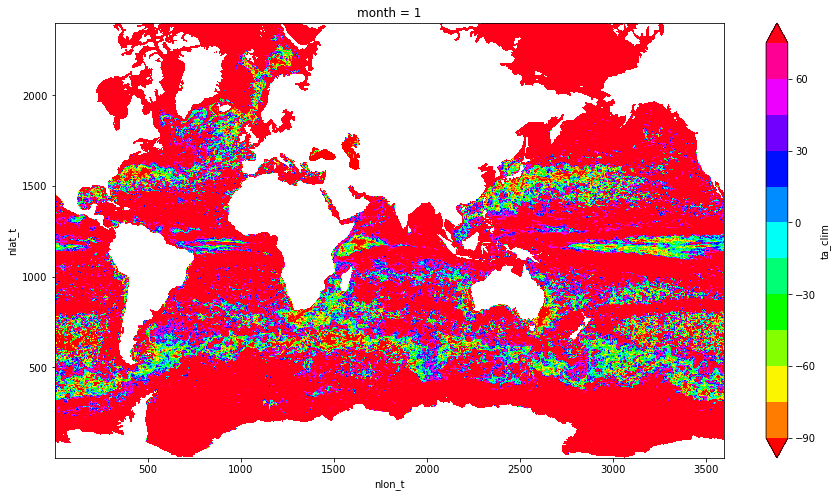

In [6]:
#global turner angle
fig, ax = plt.subplots(figsize=(15,8))
ta.isel(month=0).plot.contourf(levels=np.arange(-90, 90, 15), cmap='hsv');

# 2) Basin-wide annual-mean <a class='anchor' id='second-bullet'> </a>